<a href="https://colab.research.google.com/github/muskaansandhu/Datasci223-Final-Project/blob/main/Model_Building_MS_DataSci223FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#Installing all the required packages
%pip install -q numpy pandas matplotlib seaborn scikit-learn tensorflow
import os
import string
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading in the dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_data.csv']))

Saving heart_failure_data.csv to heart_failure_data.csv


In [2]:
#Viewing the dataset
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

# ***Model 1: Logistic Regression ***


In [45]:
#Data Preprocessing

  #Features vs. Target Variable
X = df.drop(['DEATH_EVENT', 'time'], axis=1)
Y = df['DEATH_EVENT']

  #Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

  #Train, Test Split ~ 80-20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled, Y, test_size=0.20, random_state=42)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#MODEL BUILDING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_space=np.logspace(-5, 2, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2'], 'solver':['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[100,1,000,10,000]}
logistic_regression = LogisticRegression()
logistic_regression_cv = GridSearchCV(logistic_regression, param_grid, cv=kf)
logistic_regression_cv.fit(X_train, y_train)


In [47]:
#DETERMINING THE BEST MODEL HYPERPARAMETERS
print(f"Best Logistic Regression Parameters: {logistic_regression_cv.best_params_}")
print(f"Best Logistic Regression Accuracy Score: {logistic_regression_cv.best_score_}")

Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy Score: 0.8406914893617022


In [48]:
#FITTING THE TRAINING DATA ON BEST MODEL HYPERPARAMETERS
best_logistic_regression_model = LogisticRegression(C=0.1, max_iter= 100, penalty = "l1", solver = "liblinear")
best_logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [50]:
#EVALUATING MODEL PERFORMANCE ON TEST HOLDOUT
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_test_pred = best_logistic_regression_model.predict(X_test)
validation_score = accuracy_score(y_test, y_test_pred)
print(f"Test Hold-out Score: {validation_score}")
prec = precision_score(y_test, y_test_pred, average='macro', zero_division = 1)
print(f"Precision: {prec}")
rec = recall_score(y_test, y_test_pred, average = 'macro')
print(f"Recall: {rec}")
f1 = f1_score(y_test, y_test_pred, average = 'macro')
print(f"f1: {f1}")


Test Hold-out Score: 0.8
Precision: 0.8248974008207934
Recall: 0.7714285714285714
f1: 0.7802197802197802


In [51]:
#LOOKING AT CONFUSION MATRIX
cm = confusion_matrix(y_test, y_test_pred, labels=best_logistic_regression_model.classes_)
print("Confusion Matrix:")
cm_df = pd.DataFrame(cm, index=best_logistic_regression_model.classes_, columns=best_logistic_regression_model.classes_)
print(cm_df)

Confusion Matrix:
    0   1
0  33   2
1  10  15


# **Model 2: Random Forest**

In [55]:
#Since we don't need to scale the data for random forest

X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [84]:
#MODEL BUILDING FOR RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 10, 20],'min_samples_split': [2,4,6,8,10]}
random_forest = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest, rf_param_grid, cv=kf)
random_forest_cv.fit(X2_train, y2_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [85]:
#DETERMINING THE BEST MODEL HYPERPARAMETERS
print(f"Best Random Forest Parameters: {random_forest_cv.best_params_}")
print(f"Best Random Forest Accuracy Score: {random_forest_cv.best_score_}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy Score: 0.886968085106383


In [86]:
#FITTING THE TRAINING DATA ON BEST MODEL HYPERPARAMETERS
best_random_forest_model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50)
best_random_forest_model.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=50)

In [87]:
#EVALUATING MODEL PERFORMANCE ON TEST HOLDOUT
rf_test_pred = best_random_forest_model.predict(X2_test)
validation_score_rf = accuracy_score(y2_test, rf_test_pred)
print(f"Test Hold-out Score: {validation_score_rf}")
prec_rf = precision_score(y2_test, rf_test_pred, average='macro', zero_division = 1)
print(f"Precision: {prec_rf}")
rec_rf = recall_score(y2_test, rf_test_pred, average = 'macro')
print(f"Recall: {rec_rf}")
f1_rf = f1_score(y2_test, rf_test_pred, average = 'macro')
print(f"f1: {f1_rf}")

Test Hold-out Score: 0.7333333333333333
Precision: 0.7741407528641571
Recall: 0.6914285714285714
f1: 0.6919127086007701


In [88]:
#CONFUSION MATRIX

cm_rf = confusion_matrix(y2_test, rf_test_pred, labels=best_random_forest_model.classes_)
print("Confusion Matrix:")
cm_rf_df = pd.DataFrame(cm_rf, index=best_random_forest_model.classes_, columns=best_random_forest_model.classes_)
print(cm_rf_df)

Confusion Matrix:
    0   1
0  33   2
1  14  11


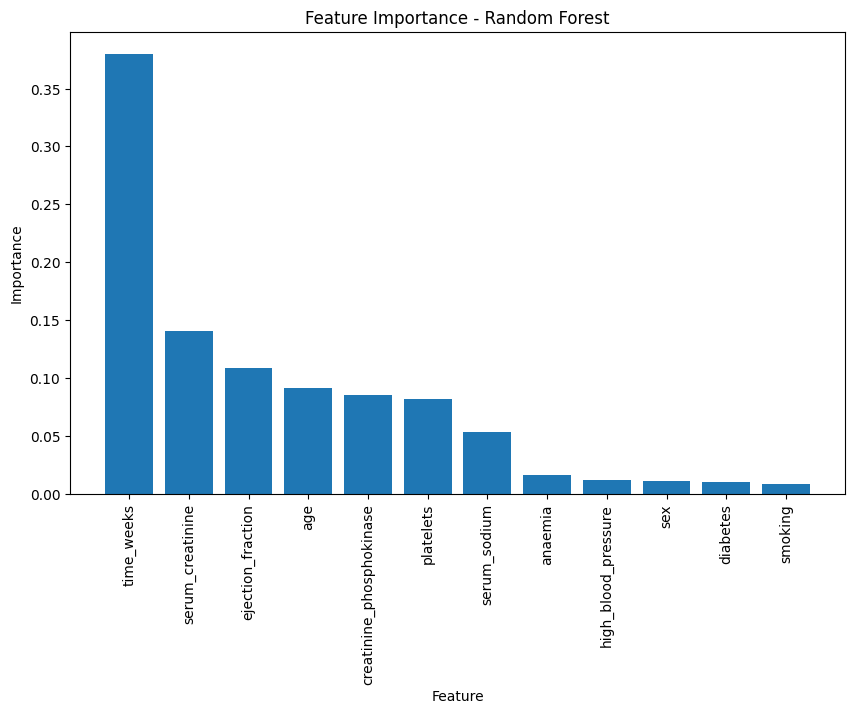

In [106]:
#USING FEATURE IMPORTANCE FOR RANDOM FOREST

importances = best_random_forest_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [119]:
#USING FEATURE IMPORTANCE FOR LOGISTIC REGRESSION

coefficients = best_logistic_regression_model.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()


coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)


print(coef_df[['Feature', 'Coefficient']].to_string(index=False))

                 Feature  Coefficient
              time_weeks    -1.006105
        serum_creatinine     0.410221
       ejection_fraction    -0.366912
                     age     0.213969
            serum_sodium    -0.004397
                 anaemia     0.000000
creatinine_phosphokinase     0.000000
                diabetes     0.000000
     high_blood_pressure     0.000000
               platelets     0.000000
                     sex     0.000000
                 smoking     0.000000
